In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

sns.set(color_codes=True)

import urllib.request
import json

# Plotting the Composition of Data



## Static Composition

### Pie Chart

In [2]:
p = sns.load_dataset('penguins')

In [3]:
p.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
s = p.groupby('species')['species'].count()

In [5]:
s

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: species, dtype: int64

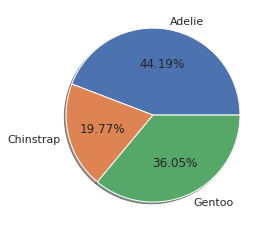

In [6]:
plt.pie(s, labels = s.index, autopct = "%.2f%%", shadow = True)
plt.show()

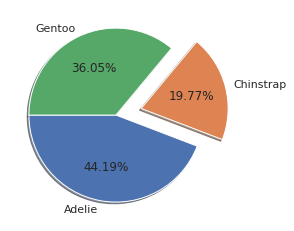

In [7]:
plt.pie(s, labels = s.index, autopct = "%.2f%%", shadow = True
        , explode = [0, 0.3, 0], startangle = 180)
plt.show()

### Donut Chart

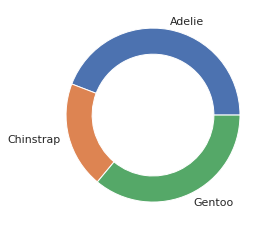

In [8]:
plt.pie(s, labels = s.index, wedgeprops=dict(width = 0.3));
plt.show()

In [9]:
cmap = plt.get_cmap('tab10')
my_colors = cmap(np.array([0, 1, 2]))

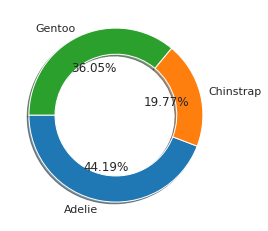

In [10]:
plt.pie(s, labels = s.index, wedgeprops=dict(width = 0.3),
        colors = my_colors, autopct = "%.2f%%", shadow = True,
        startangle = 180);
plt.show()

In [11]:
i = p.groupby('island')['island'].count()
cmap = plt.get_cmap('Dark2')
my_colors = cmap(np.array([0, 1, 2]))

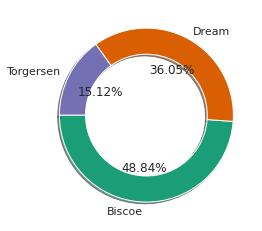

In [12]:
plt.pie(i, labels = i.index, wedgeprops=dict(width = 0.3),
        colors = my_colors, autopct = "%.2f%%", shadow = True,
        startangle = 180);
plt.show()

In [13]:
cT = pd.crosstab(p.island, p.species)

In [14]:
cT

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


In [15]:
i = cT.sum(axis = 1)

In [16]:
i

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

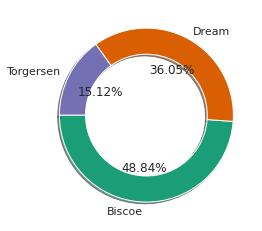

In [17]:
plt.pie(i, labels = i.index, wedgeprops=dict(width = 0.3),
        colors = my_colors, autopct = "%.2f%%", shadow = True,
        startangle = 180);
plt.show()

In [18]:
s = cT.values.flatten()

In [19]:
s

array([ 44,   0, 124,  56,  68,   0,  52,   0,   0])

In [20]:
cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.array([0, 4, 8]))
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11]))

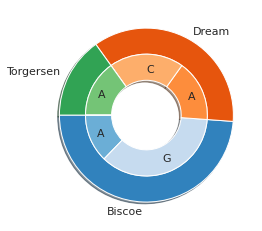

In [21]:
plt.pie(i, labels = i.index, wedgeprops=dict(width = 0.3),
        colors = outer_colors, shadow = True,
        startangle = 180, radius = 1);
plt.pie(s, wedgeprops=dict(width = 0.3),
        colors = inner_colors, shadow = True,
        startangle = 180, radius = 0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''], labeldistance = 0.75);
plt.show()

### Bar Plot

In [22]:
url = "https://api.covid19india.org/states_daily.json"
urllib.request.urlretrieve(url, 'data.json')

with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [23]:
df.tail(3)

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
1560,1,909,165,758,14,2,68,16-Aug-21,2021-08-16,0,...,20,Confirmed,405,1851,52,24696,0,17,18,502
1561,0,1543,249,1014,42,3,224,16-Aug-21,2021-08-16,0,...,147,Recovered,577,1911,223,36871,0,36,54,691
1562,0,13,0,10,0,0,1,16-Aug-21,2021-08-16,0,...,0,Deceased,3,28,1,438,0,1,1,9


In [24]:
dfT = df.tail(3)
dfT.drop('date', axis = 1, inplace = True)
dfT.drop('dateymd', axis = 1, inplace = True)

dfT.set_index('status', inplace = True)
dfT = dfT.T

dfT = dfT.apply(pd.to_numeric)
dfT.drop('tt', inplace = True)

/home/jackson/Desktop/Python Basics/env/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
dfT.head()

status,Confirmed,Recovered,Deceased
an,1,0,0
ap,909,1543,13
ar,165,249,0
as,758,1014,10
br,14,42,0


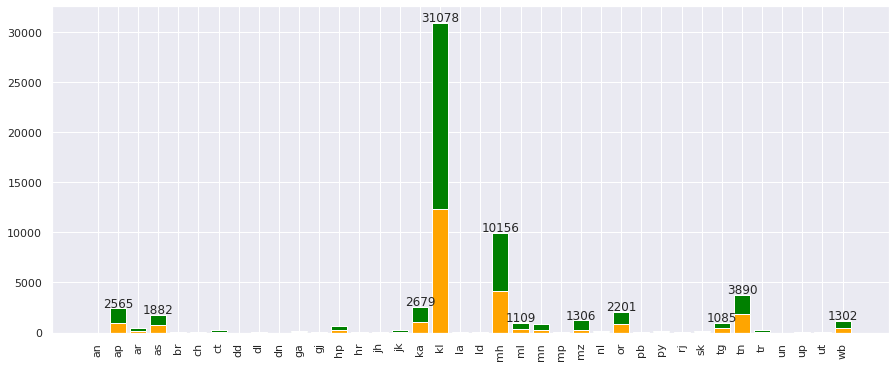

In [26]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.bar(dfT.index, dfT.Confirmed, color = 'Orange');
plt.bar(dfT.index, dfT.Recovered, bottom = dfT.Confirmed, color = 'Green');
plt.bar(dfT.index, dfT.Deceased, bottom = dfT.Confirmed + dfT.Recovered, color = 'Red');
plt.xticks(rotation = 90)

for i, val in enumerate(dfT.index):
    y = dfT.loc[val].sum() + 100
    x = i
    if y > 1000:
        plt.text(x, y, str(y), ha = 'center')
plt.show()

### Relative Stacked Bar Plots

In [27]:
dfT['Total'] = 0
dfT['Total'] = dfT.sum(axis = 1)

In [28]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, an to wb
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  38 non-null     int64
 1   Recovered  38 non-null     int64
 2   Deceased   38 non-null     int64
 3   Total      38 non-null     int64
dtypes: int64(4)
memory usage: 2.5+ KB


In [29]:
dfT['CFraction'] = dfT['Confirmed']/dfT['Total']
dfT['RFraction'] = dfT['Recovered']/dfT['Total']
dfT['DFraction'] = dfT['Deceased']/dfT['Total']

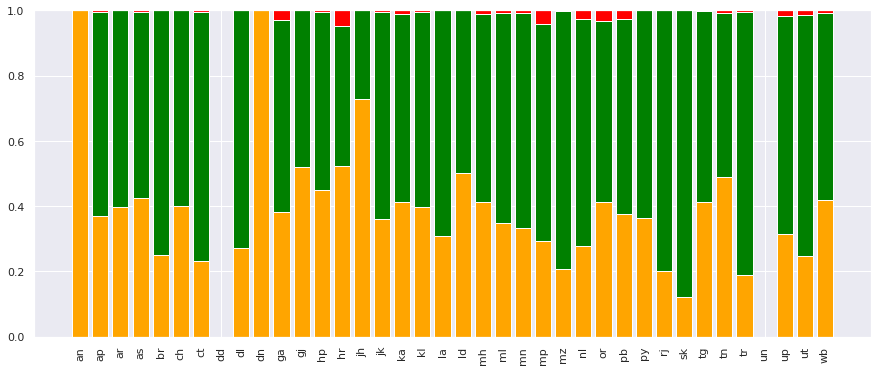

In [30]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.bar(dfT.index, dfT.CFraction, color = 'Orange');
plt.bar(dfT.index, dfT.RFraction, bottom = dfT.CFraction, color = 'Green');
plt.bar(dfT.index, dfT.DFraction, bottom = dfT.CFraction + dfT.RFraction, color = 'Red');
plt.xticks(rotation = 90)
plt.show()

In [31]:
dfT = dfT.sort_values('CFraction', ascending = False)

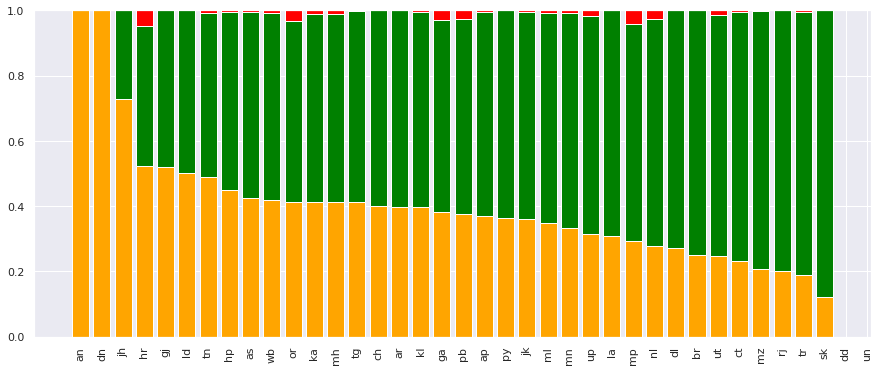

In [32]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.bar(dfT.index, dfT.CFraction, color = 'Orange');
plt.bar(dfT.index, dfT.RFraction, bottom = dfT.CFraction, color = 'Green');
plt.bar(dfT.index, dfT.DFraction, bottom = dfT.CFraction + dfT.RFraction, color = 'Red');
plt.xticks(rotation = 90)
plt.show()

In [33]:
dfT = dfT.sort_values('Confirmed', ascending = False)

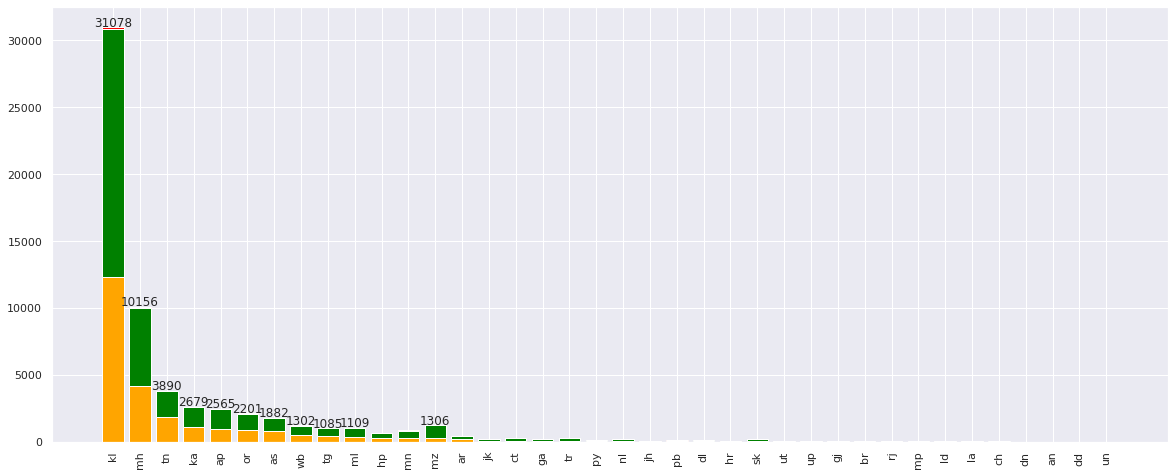

In [34]:
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.bar(dfT.index, dfT.Confirmed, color = 'Orange');
plt.bar(dfT.index, dfT.Recovered, bottom = dfT.Confirmed, color = 'Green');
plt.bar(dfT.index, dfT.Deceased, bottom = dfT.Confirmed + dfT.Recovered, color = 'Red');
plt.xticks(rotation = 90)

for i, val in enumerate(dfT.index):
    y = (int)(dfT.loc[val, 'Total']) + 100
    x = i
    if y > 1000:
        plt.text(x, y, str(y), ha = 'center')
plt.show()

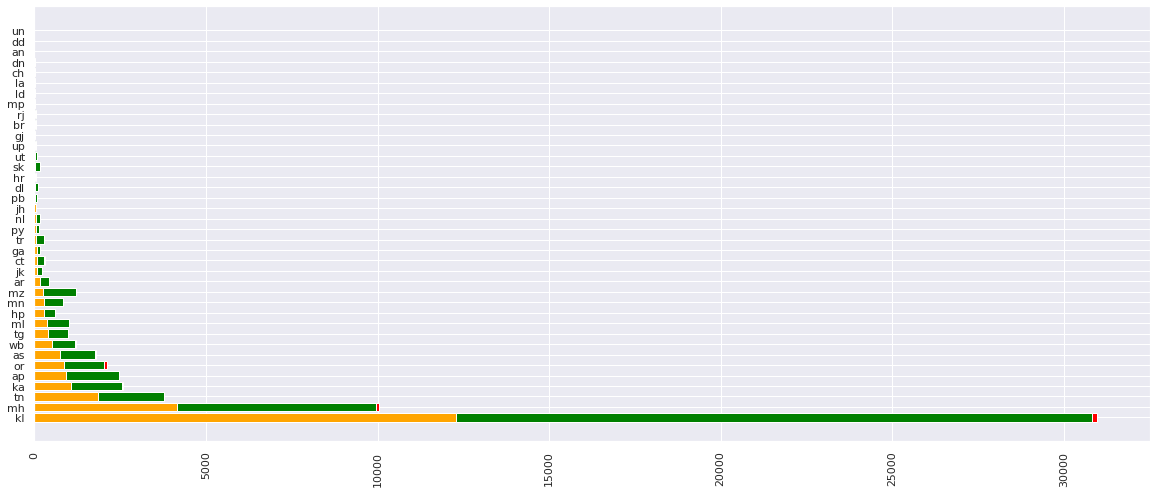

In [35]:
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.barh(dfT.index, dfT.Confirmed, color = 'Orange');
plt.barh(dfT.index, dfT.Recovered, left = dfT.Confirmed, color = 'Green');
plt.barh(dfT.index, dfT.Deceased, left = dfT.Confirmed + dfT.Recovered, color = 'Red');
plt.xticks(rotation = 90)
plt.show()

## Time-varying Composition of Data

## Stacked Area Plots

In [36]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [37]:
df_ = df[['mh', 'date', 'status']]

In [38]:
df_['mh'] = pd.to_numeric(df_['mh'])
df_['date'] = pd.to_datetime(df_['date'])

/tmp/ipykernel_8387/3362539538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['mh'] = pd.to_numeric(df_['mh'])
/tmp/ipykernel_8387/3362539538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['date'] = pd.to_datetime(df_['date'])


In [39]:
df_.head()

,mh,date,status
0,14,2020-03-14,Confirmed
1,0,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,18,2020-03-15,Confirmed
4,0,2020-03-15,Recovered


In [40]:
df_ = df_.pivot_table(values = 'mh', columns = 'status', index = 'date')

In [41]:
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


In [42]:
cmap = plt.get_cmap('tab10')
my_colors = cmap(np.array([1, 3, 2]))

In [43]:
df_['Confirmed'] = np.abs(df_['Confirmed'])

In [44]:
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


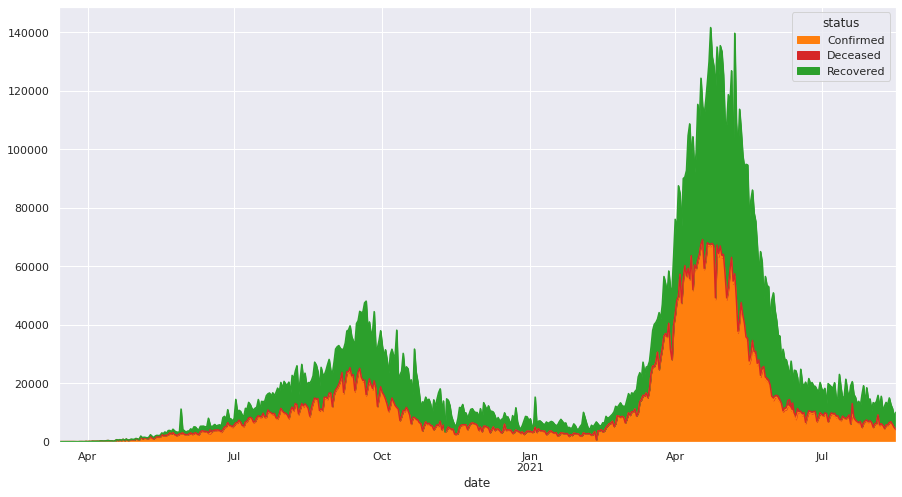

In [45]:
df_.plot.area(figsize = (15, 8), color = my_colors);

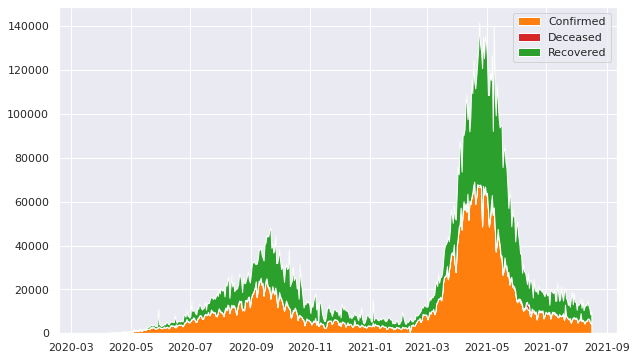

In [46]:

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.stackplot(df_.index, df_.Confirmed, df_.Deceased, df_.Recovered, 
              colors = my_colors, 
              labels = ['Confirmed', 'Deceased', 'Recovered']);
plt.legend();

In [47]:
def plot_stacked_area(state):
    df_ = df[[state , 'date', 'status']]
    df_[state] = pd.to_numeric(df_[state])
    df_['date'] = pd.to_datetime(df_['date'])
    df_ = df_.pivot_table(values = state, columns = 'status', index = 'date')
    fig = plt.gcf()
    fig.set_size_inches(15, 6)
    plt.stackplot(df_.index, df_.Confirmed, df_.Deceased, df_.Recovered, 
              colors = my_colors, 
              labels = ['Confirmed', 'Deceased', 'Recovered']);
    plt.legend();

/tmp/ipykernel_8387/3494612291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[state] = pd.to_numeric(df_[state])
/tmp/ipykernel_8387/3494612291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['date'] = pd.to_datetime(df_['date'])


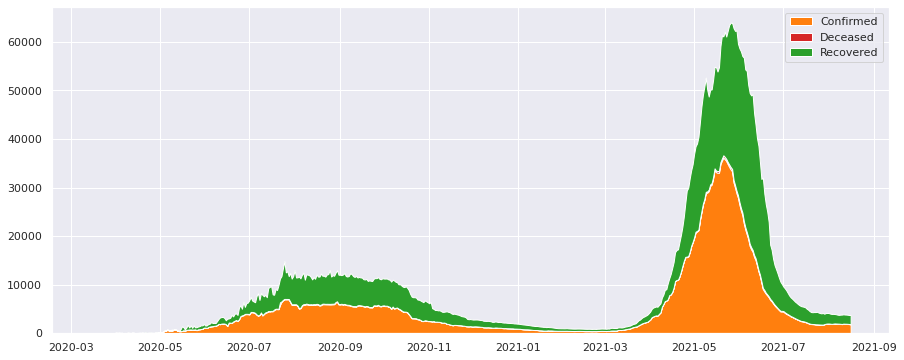

In [48]:
plot_stacked_area('tn');

In [49]:
def plot_stacked_area_relative(state):
    df_ = df[[state , 'date', 'status']]
    df_[state] = pd.to_numeric(df_[state])
    df_['date'] = pd.to_datetime(df_['date'])
    df_ = df_.pivot_table(values = state, columns = 'status', index = 'date')
    fig = plt.gcf()
    fig.set_size_inches(15, 6)
    plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis = 1), 
                  df_.Deceased/df_.sum(axis = 1), 
                  df_.Recovered/df_.sum(axis = 1), 
              colors = my_colors, 
              labels = ['Confirmed', 'Deceased', 'Recovered']);
    plt.legend();

/tmp/ipykernel_8387/1724702707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[state] = pd.to_numeric(df_[state])
/tmp/ipykernel_8387/1724702707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['date'] = pd.to_datetime(df_['date'])


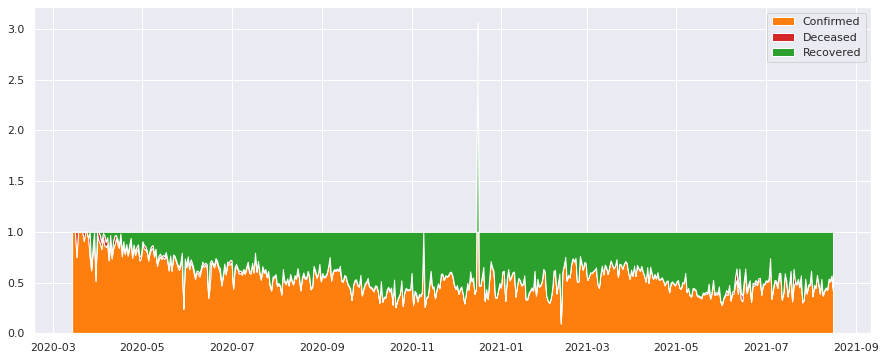

In [50]:
plot_stacked_area_relative('mh')

# Plotting Relationship between Data

## Scatter Plot

In [51]:
t = sns.load_dataset('tips')

In [52]:
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


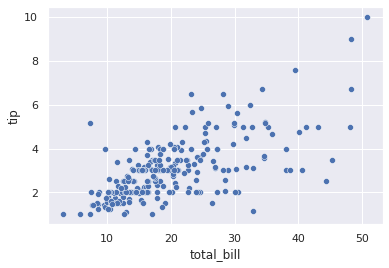

In [53]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = t);

In [54]:
t['tip_fraction'] = t['total_bill']/t['tip']

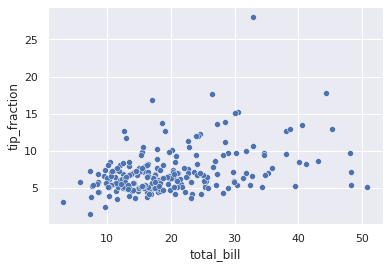

In [55]:
sns.scatterplot(x = 'total_bill', y = 'tip_fraction', data = t);

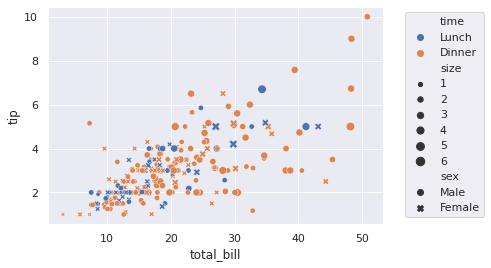

In [56]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = t, 
                hue = 'time', style = 'sex', size = 'size');
plt.legend(bbox_to_anchor = (1.05, 1))

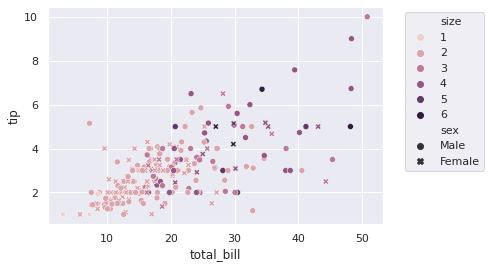

In [57]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = t, 
                hue = 'size', style = 'sex');
plt.legend(bbox_to_anchor = (1.05, 1))

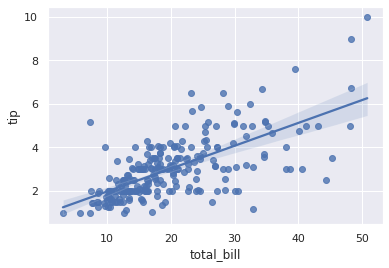

In [58]:
sns.regplot(x = 'total_bill', y = 'tip', data = t);

In [59]:
d = sns.load_dataset('diamonds')

In [60]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


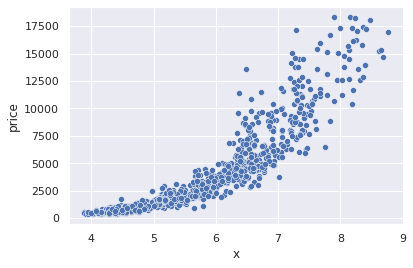

In [61]:
sns.scatterplot(x = 'x', y = 'price', data = d.sample(1000));

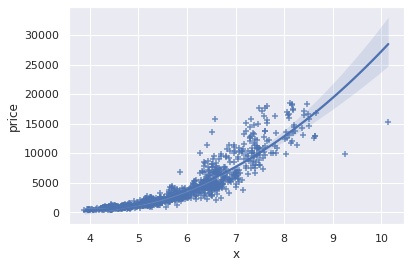

In [62]:
sns.regplot(x = 'x', y = 'price', data = d.sample(1000),
            marker = '+', order = 2);

## Bar Plots

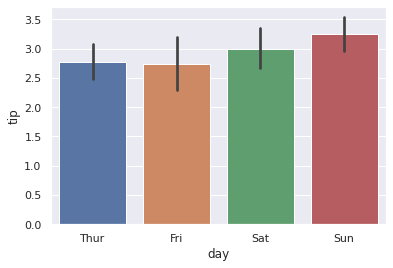

In [63]:
sns.barplot(x = 'day', y = 'tip', data = t);

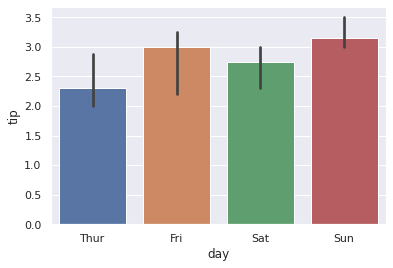

In [64]:
sns.barplot(x = 'day', y = 'tip', data = t, estimator = np.median);

In [65]:
def my_estimator(v):
    return np.quantile(v, 0.25)

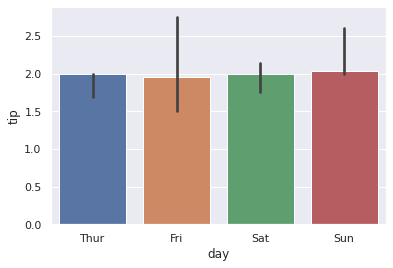

In [66]:
sns.barplot(x = 'day', y = 'tip', data = t, estimator = my_estimator);

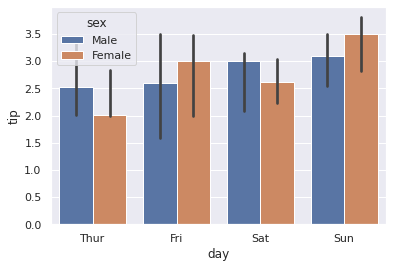

In [67]:
sns.barplot(x = 'day', y = 'tip', hue = 'sex' ,data = t, estimator = np.median);

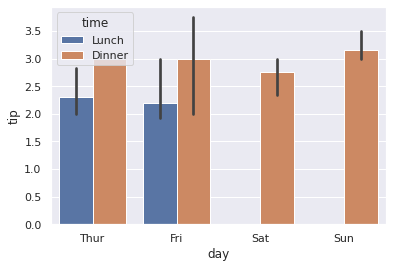

In [68]:
sns.barplot(x = 'day', y = 'tip', hue = 'time' ,data = t, estimator = np.median);

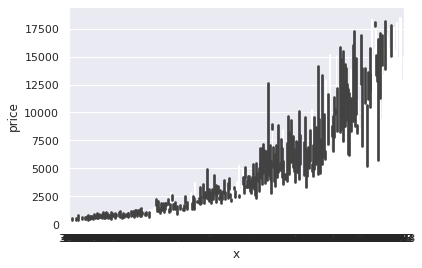

In [69]:
sns.barplot(x = 'x', y = 'price', data = d.sample(1000));

In [70]:
d['x_q'] = pd.cut(d['x'], bins = 7)

In [71]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(3.069, 4.603]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(3.069, 4.603]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(3.069, 4.603]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(3.069, 4.603]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(3.069, 4.603]"


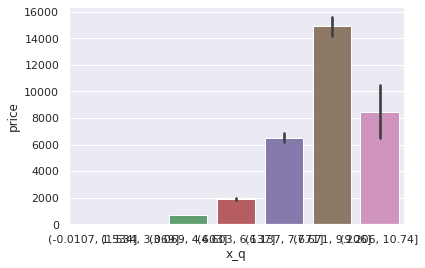

In [72]:
sns.barplot(x = 'x_q', y = 'price', data = d.sample(1000));

In [73]:
d['x_q'] = pd.cut(d['x'], bins = 20)

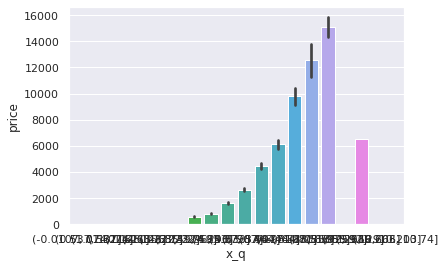

In [74]:
sns.barplot(x = 'x_q', y = 'price', data = d.sample(1000));

In [75]:
d['x_q'] = pd.cut(d['x'], bins = 20, labels = False)

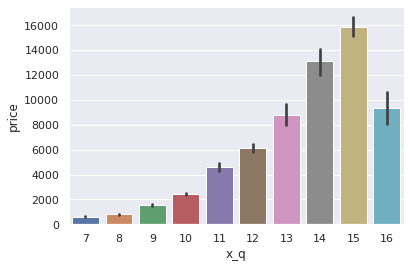

In [76]:
sns.barplot(x = 'x_q', y = 'price', data = d.sample(1000));

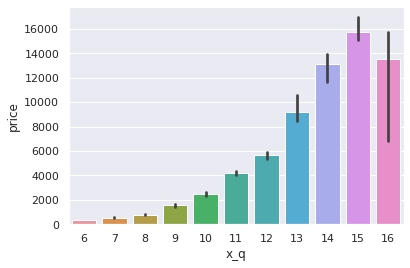

In [77]:
sns.barplot(x = 'x_q', y = 'price', data = d.sample(1000), estimator = np.median);

## Line Plot

In [78]:
f = sns.load_dataset('fmri')

In [79]:
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


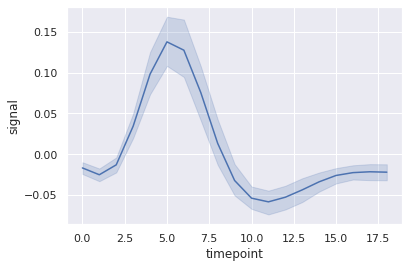

In [80]:
sns.lineplot(x = 'timepoint', y = 'signal', data = f);

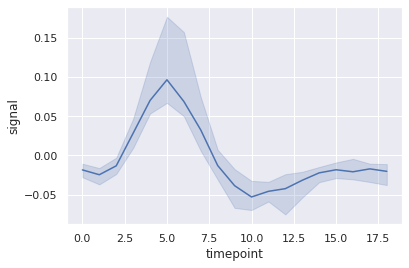

In [81]:
sns.lineplot(x = 'timepoint', y = 'signal', data = f, estimator = np.median);

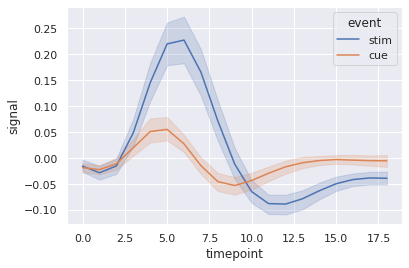

In [82]:
sns.lineplot(x = 'timepoint', y = 'signal', 
             data = f, hue = 'event');

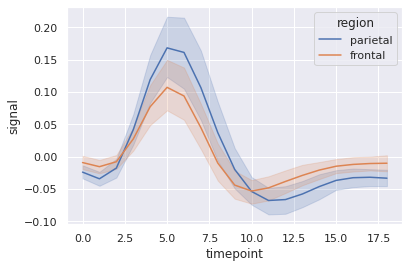

In [83]:
sns.lineplot(x = 'timepoint', y = 'signal', 
             data = f, hue = 'region');

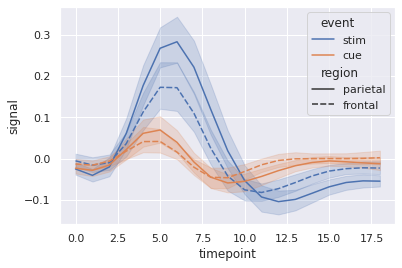

In [84]:
sns.lineplot(x = 'timepoint', y = 'signal', 
             data = f, hue = 'event', style = 'region');

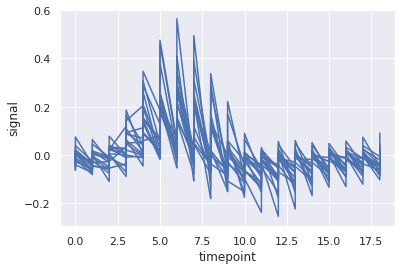

In [85]:
sns.lineplot(x = 'timepoint', y = 'signal', units = 'subject', data = f, estimator = None);

In [86]:
f_ = f[(f.region == 'parietal') & (f.event == 'stim')]

In [87]:
f_.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


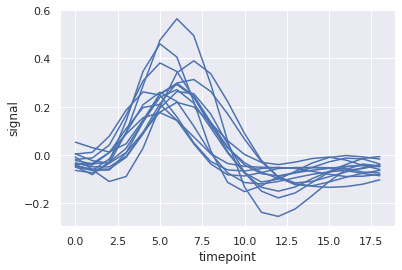

In [88]:
sns.lineplot(x = 'timepoint', y = 'signal', units = 'subject', data = f_, estimator = None);

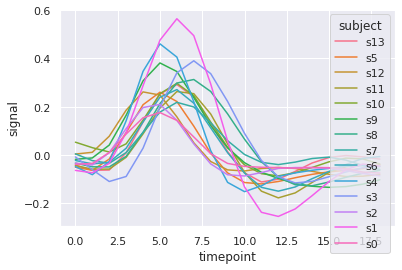

In [89]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'subject', data = f_, estimator = None);

In [90]:
url = "https://api.covid19india.org/states_daily.json"
urllib.request.urlretrieve(url, 'data.json')

with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date'])
df.drop('tt', axis = 1, inplace = True)
df.set_index('date', inplace = True)
df = df[df['status'] == 'Confirmed']
df.drop('status', axis = 1, inplace = True)
# df.drop('date', axis = 1, inplace = True)
df.drop('dateymd', axis = 1, inplace = True)
df = df.apply(pd.to_numeric)
df.reset_index(inplace = True)

In [91]:
df.head()

,date,an,ap,ar,as,br,ch,ct,dd,dl,...,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,0,1,0,0,0,0,0,0,7,...,0,3,0,1,1,0,0,12,0,0
1,2020-03-15,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,1,0,0
2,2020-03-16,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,2020-03-17,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,2,0,1
4,2020-03-18,0,0,0,0,0,0,0,0,2,...,0,3,0,8,1,0,0,2,1,0


In [92]:
df_ = pd.melt(df, id_vars = "date", 
              value_vars = list(df.columns).remove("date"),
              var_name = "state", value_name = "confirmed")

In [93]:
df_.head()

,date,state,confirmed
0,2020-03-14,an,0
1,2020-03-15,an,0
2,2020-03-16,an,0
3,2020-03-17,an,0
4,2020-03-18,an,0


/home/jackson/Desktop/Python Basics/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


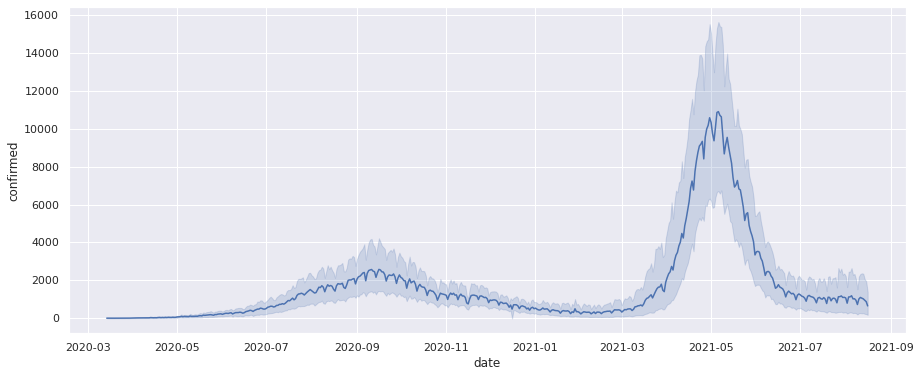

In [94]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', data = df_);

/home/jackson/Desktop/Python Basics/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


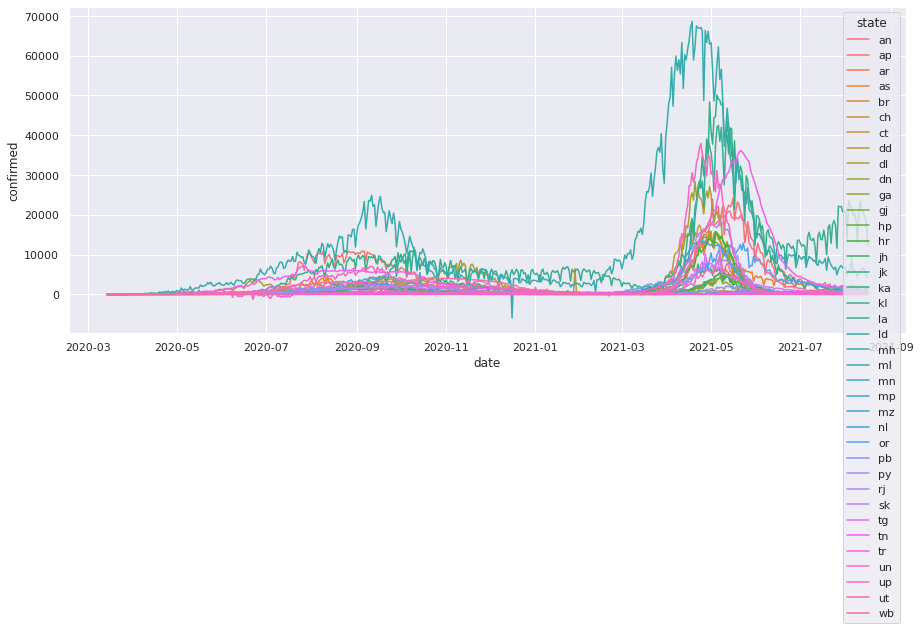

In [95]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue = 'state' ,data = df_);

In [96]:
states = ['mh', 'tn', 'wb', 'dl', 'gj', 'up']
df_ = df_[df_['state'].isin(states)]

/home/jackson/Desktop/Python Basics/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


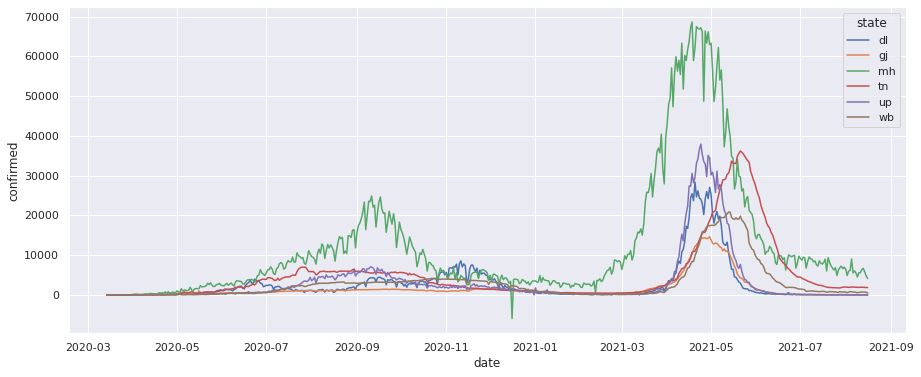

In [97]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue = 'state' ,data = df_);

/home/jackson/Desktop/Python Basics/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


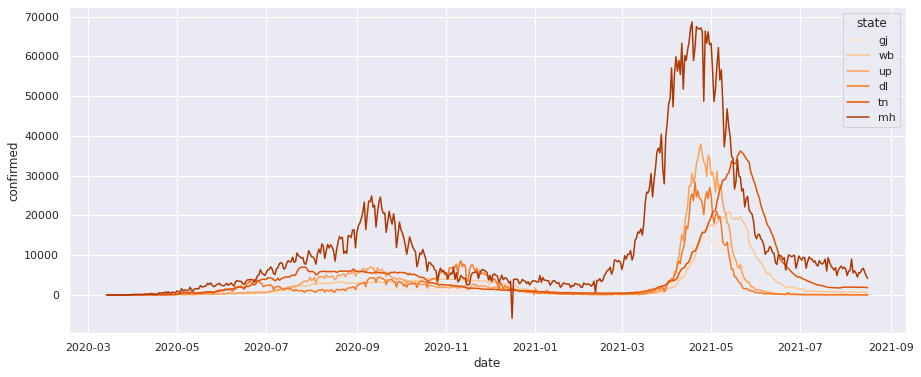

In [98]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue = 'state' ,data = df_,
             palette = 'Oranges', hue_order = ['gj','wb','up','dl','tn','mh']);

## HeatMaps

In [99]:
x = np.random.rand(10 ,10)

In [100]:
x

array([[0.33959382, 0.31586028, 0.61933682, 0.46487022, 0.0876913 ,
        0.75089675, 0.10237231, 0.80612474, 0.01214298, 0.80559944],
       [0.19509735, 0.22261016, 0.43151004, 0.09411647, 0.12358379,
        0.04480552, 0.98026028, 0.37819328, 0.41543863, 0.59831206],
       [0.49856037, 0.41251311, 0.18246044, 0.32695138, 0.11598864,
        0.74028206, 0.07456664, 0.97095242, 0.45001141, 0.95351981],
       [0.45275588, 0.67783693, 0.78169176, 0.96311805, 0.0137509 ,
        0.80001721, 0.92920593, 0.86649317, 0.83224788, 0.7054622 ],
       [0.69408147, 0.8092549 , 0.945375  , 0.55074953, 0.68175738,
        0.07418904, 0.45285043, 0.74104882, 0.80080674, 0.12925641],
       [0.71566068, 0.3428112 , 0.21310955, 0.57924489, 0.84547344,
        0.87673087, 0.4003344 , 0.75200742, 0.39527269, 0.97536032],
       [0.67711313, 0.6187553 , 0.25195746, 0.12716706, 0.90842   ,
        0.02327169, 0.08522143, 0.65218985, 0.58463501, 0.64838748],
       [0.12546645, 0.82675363, 0.6414043

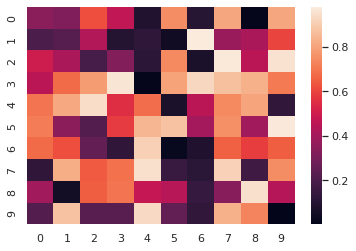

In [101]:
sns.heatmap(x);

In [102]:
fl = sns.load_dataset('flights')

In [103]:
fl.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [104]:
fl_ = pd.pivot(fl, index = 'year', columns = 'month', values = 'passengers')

In [105]:
fl_.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


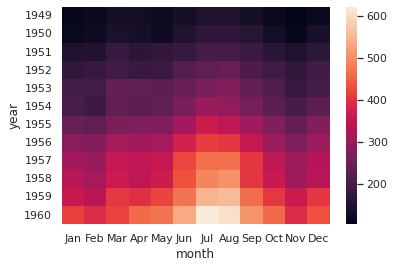

In [106]:
sns.heatmap(fl_);

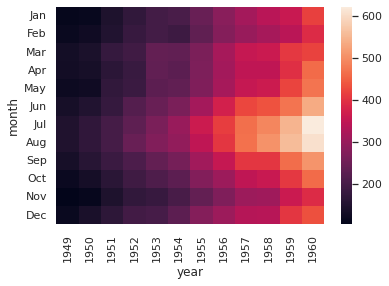

In [107]:
sns.heatmap(fl_.T);

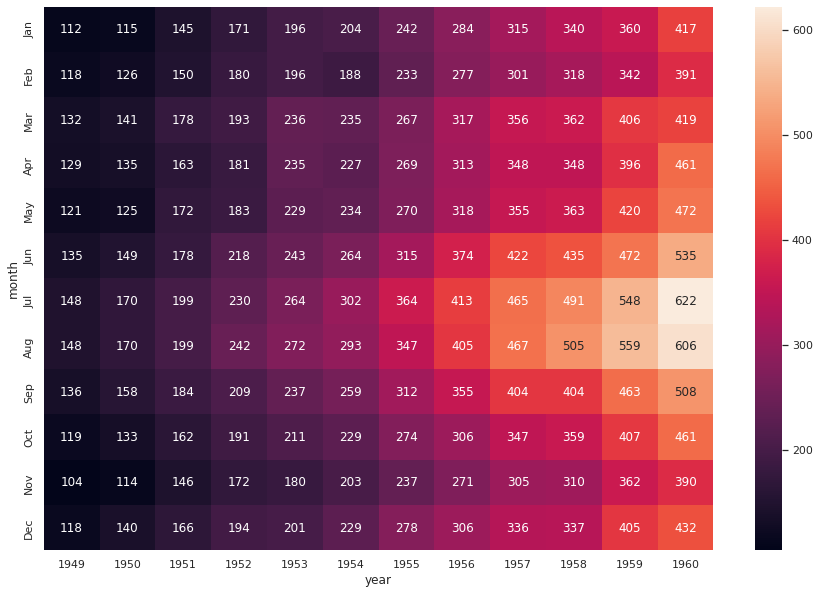

In [108]:
fig = plt.gcf()
fig.set_size_inches(15, 10);
sns.heatmap(fl_.T, annot = True, fmt = "d");

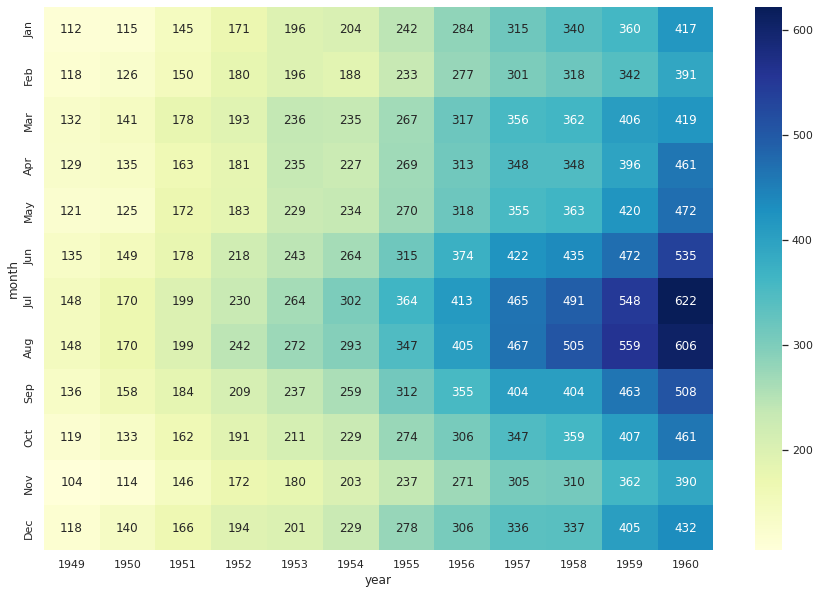

In [109]:
fig = plt.gcf()
fig.set_size_inches(15, 10);
sns.heatmap(fl_.T, annot = True, fmt = "d", cmap = "YlGnBu");

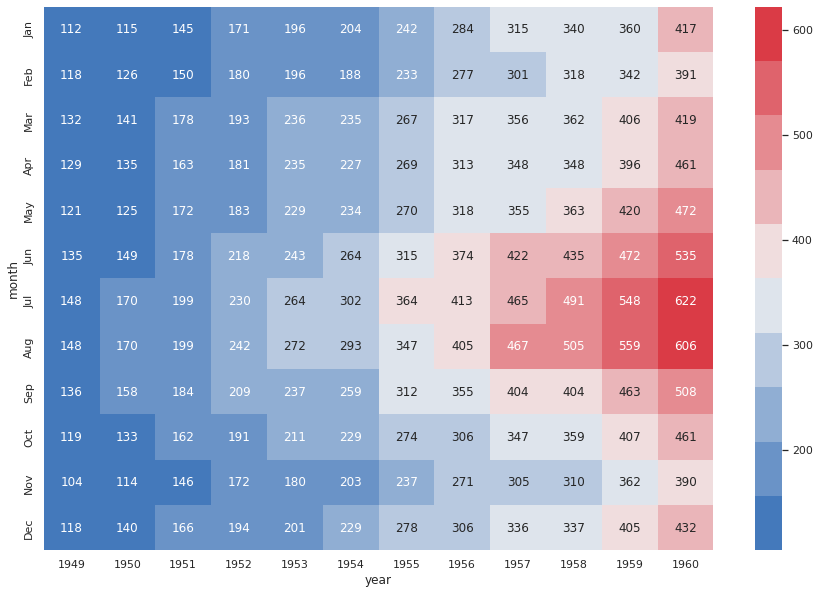

In [110]:
fig = plt.gcf()
fig.set_size_inches(15, 10);
sns.heatmap(fl_.T, annot = True, fmt = "d", 
            cmap = sns.diverging_palette(250, 10, n = 10));

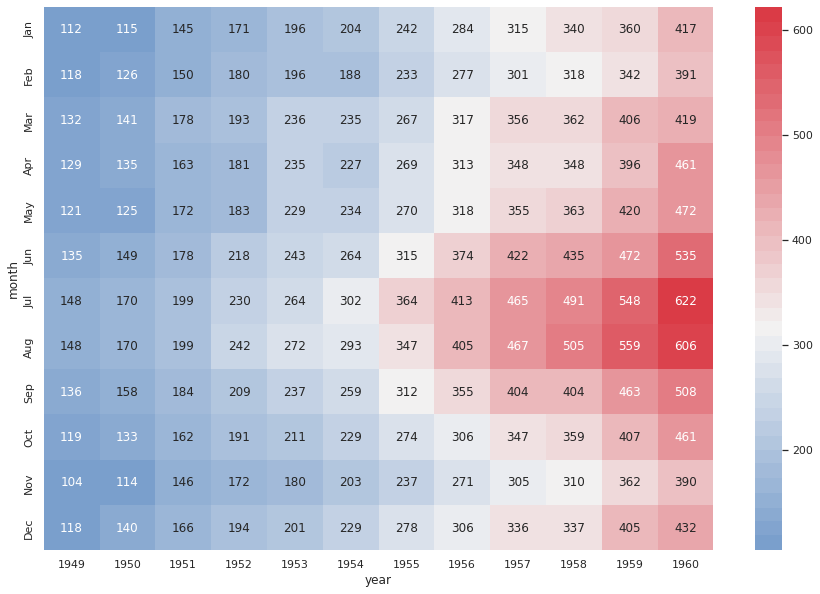

In [111]:
fig = plt.gcf()
fig.set_size_inches(15, 10);
sns.heatmap(fl_.T, annot = True, fmt = "d", 
            cmap = sns.diverging_palette(250, 10, n = 45),
            center = fl_.loc[1955, 'Jun']);

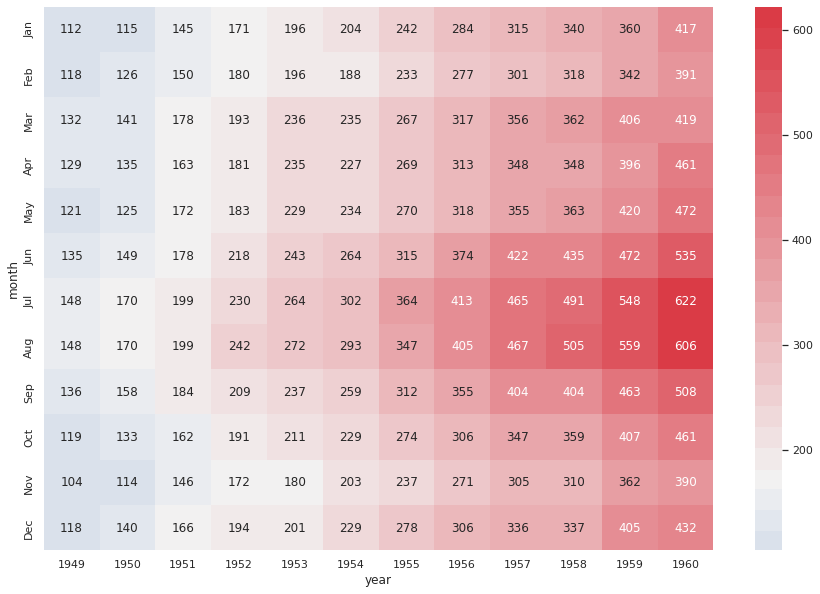

In [112]:
fig = plt.gcf()
fig.set_size_inches(15, 10);
sns.heatmap(fl_.T, annot = True, fmt = "d", 
            cmap = sns.diverging_palette(250, 10, n = 45),
            center = fl_.loc[1952, 'Jan']);